<a href="https://colab.research.google.com/github/kvelez-iastate/S2021_ME592/blob/Homework1/Homework1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1
Due February 15th, 2021

Kimberly Velez 

Kyle Swanton

In [1]:
# Mount session to Homework 1 folder in Google Drive
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks/ME592/ME592_HW1', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [2]:
# Import needed packages
import numpy as np

import scipy

import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import pandas as pd 

# 2.1 Images 
Task:
1. Load sudoku-original.png image in grayscale mode. **COMPLETE**
2. Plot the histogram of intensities. **COMPLETE**
3. Choose 4 appropriate points and perform a Perspective Transformation to obtain
the sudoku as a proper square.

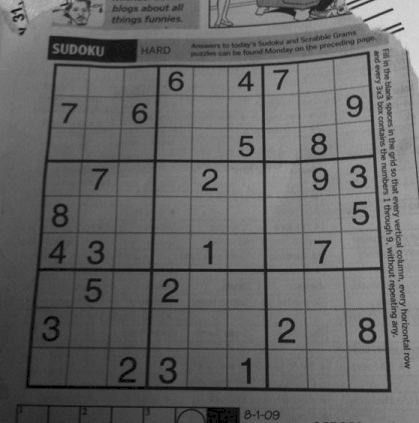

In [4]:
# 1. Load sudoku-original.png image in grayscale mode

sudoku_img = cv2.imread('/content/mnt/My Drive/Colab Notebooks/ME592/ME592_HW1/sudoku-original.png',0) # 0 here brings it in as grayscale
cv2_imshow(sudoku_img)

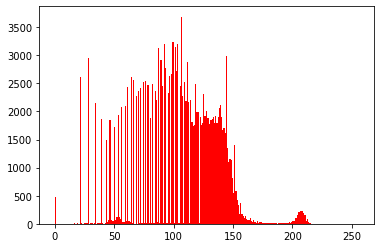

In [14]:
# 2. Plot the histogram of intensities

# flatten the image (make the 2D into 1D)
flat_sudoku = sudoku_img.flatten()

# number of bins in the histogram, grayscale values
bins = 256 

# range of the bins, grayscale values
range = [0,256]

# plot the histogram in red
_ = plt.hist(flat_sudoku,bins,range, color = 'r')

In [ ]:
# 3. Choose 4 appropriate points and perform a Perspective Transformation to obtain the sudoku as a proper square

# 2.2 Time Series
Data: Experimental data used to analyze appliances energy use in an energy efficient
building. The data set is collected at a frequency of 10 min for about 4.5 months. The
house temperature and humidity conditions were monitored with a ZigBee wireless sensor
network. Each wireless node transmitted the temperature and humidity conditions at a
period of around 3.3 min. Then, the wireless data was averaged for 10 minute periods.
The energy data was logged every 10 minutes with m-bus energy meters. Weather from
the nearest airport weather station (Chievres Airport, Belgium) was downloaded from
a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Random variable is included in
1
the data set for testing the regression models and to filter out non predictive attributes
(parameters). This data is adopted from the UCI machine learning repositories [1] and
several aspects of the data were analyzed [2]. Our motivation is to explore some aspects
of this time series data.
Task: Load the data (energydata complete.csv) and perform the following analysis.
1. Plot the appliances energy consumption for whole period and a closer look at any
one week of consumption.
2. Plot heatmap of hourly consumption of appliances for a week. An example heatmap
looks like Figure 1.
3. Plot the histogram of energy consumption of appliances.
4. Construct a feature variable NSM (no. of seconds from midnight) and plot energy
consumption vs. NSM.
5. Plot appliances energy consumption vs. Press mm Hg.
6. It is observed that the major contributing factors for the energy consumption
among all other features is NSM and Press mm Hg. Comment on it.
Figure 1: Example heatmap of hourly energy consumption of appliances over a week

# 2.3 Multi - Variate
Data: The NASA data set comprises different sizes of NACA 0012 airfoils at various wind
tunnel speeds and angles of attack. The span of the airfoil and the observer position were
the same in all of the experiments. This problem has the following inputs:
1. Frequency, in Hz.
2. Angle of attack, in degrees.
3. Chord length, in meters.
4. Free-stream velocity, in meters per second.
5. Suction side displacement thickness, in meters.
2
The only output is Scaled sound pressure level, in decibels.
Task: Load the data and Compute the following descriptive statistics of the data:
1. Mean
2. Variance (or Standard Deviation)
3. Median
4. Kurtosis
5. Skewness
6. Range